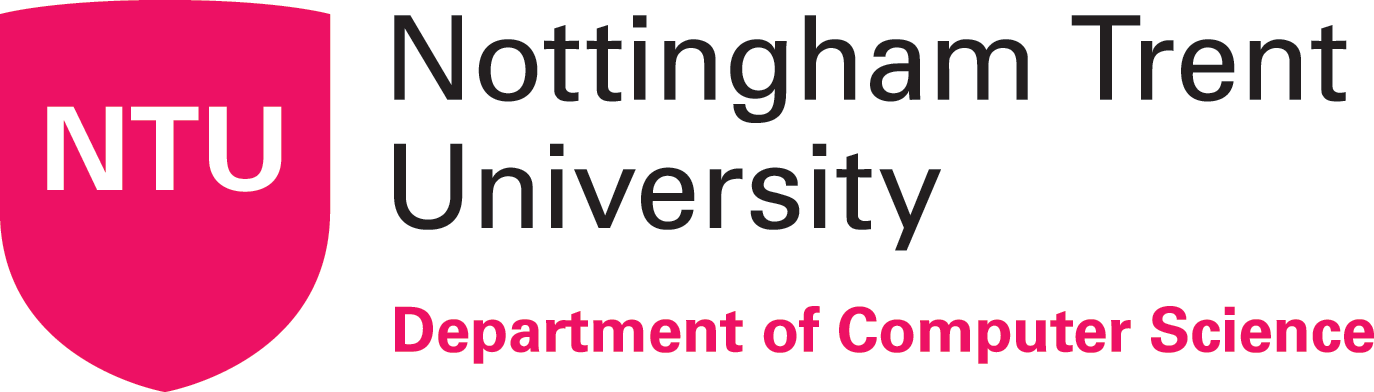

# SOFT40161 - Introduction to Computer Programming
# Submission of the Coursework

## Name: Ruth Amey
## NTU ID: N1019812

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

dataset = https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster?select=ObesityDataSet.csv

# 

Github Link: <a href="https://github.com/Ruthamey1/CP_COURSEWORK">(Click here)</a>

# Section 1: Control Structures (16 marks)


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

In [135]:
# Explanation and Documentation 

The dataset is from Mexico, Peru and Colombia which investigates obesity levels. 
FAVC 

The abbreviated features stand for: 

- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

Other features are:

- Gender
- Age
- Height
- Weight

With the target varible being: 

Obesity level (NObeyesdad)

In [80]:
#Import data from kaggle

# Download latest version
path = kagglehub.dataset_download("aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster")

print("Path to dataset files:", path)

100%|███████████████████████████████████████| 57.5k/57.5k [00:00<00:00, 455kB/s]

Extracting files...
Path to dataset files: /Users/ruthamey/.cache/kagglehub/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/versions/1


In [82]:
#Reading csv file
data = pd.read_csv(f'{path}/ObesityDataSet.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [83]:
#Missing data
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [84]:
#Showing the dtype of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [85]:
#Basic Statistics of each numerical features
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [118]:
#categorical features
categorical = data.select_dtypes(include=[object])
#Numerical features
numerical = data.select_dtypes(exclude=object)


In [122]:
for category in categorical:
    print(data[category].value_counts())
    print()
    

Gender
Male      1068
Female    1043
Name: count, dtype: int64

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC
yes    1866
no      245
Name: count, dtype: int64

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

SMOKE
no     2067
yes      44
Name: count, dtype: int64

SCC
no     2015
yes      96
Name: count, dtype: int64

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64



In [125]:
for num in numerical:
    print(f'The mean of {num} grouped with level of obesity')
    print(data.groupby('NObeyesdad')[num].mean())
    print()

The mean of Age grouped with level of obesity
NObeyesdad
Insufficient_Weight    19.783237
Normal_Weight          21.738676
Obesity_Type_I         25.884941
Obesity_Type_II        28.233785
Obesity_Type_III       23.495554
Overweight_Level_I     23.417674
Overweight_Level_II    26.996981
Name: Age, dtype: float64

The mean of Height grouped with level of obesity
NObeyesdad
Insufficient_Weight    1.691117
Normal_Weight          1.676585
Obesity_Type_I         1.693804
Obesity_Type_II        1.771795
Obesity_Type_III       1.687559
Overweight_Level_I     1.687836
Overweight_Level_II    1.703748
Name: Height, dtype: float64

The mean of Weight grouped with level of obesity
NObeyesdad
Insufficient_Weight     49.906330
Normal_Weight           62.155052
Obesity_Type_I          92.870198
Obesity_Type_II        115.305311
Obesity_Type_III       120.941114
Overweight_Level_I      74.266828
Overweight_Level_II     82.085271
Name: Weight, dtype: float64

The mean of FCVC grouped with level of obes

In [114]:
#Finding all the males who are obese and have a high pysical activity level
ObeseTypeII_Walking = data[(data['NObeyesdad']=='Obesity_Type_II')&(data['MTRANS'] == 'Walking')]
ObeseTypeII_Walking

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
225,Male,25.0,1.83,121.0,yes,no,3.0,3.0,Sometimes,no,3.0,no,2.0,0.0,Sometimes,Walking,Obesity_Type_II


In [107]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Reflection on results 

# Section 2: Functions and Modules (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 3: Data Handling with Pandas (16 marks)  

In [ ]:
# Explanation and Documentation 

In [132]:
#See if any data is duplicated
print(data.duplicated().sum())

0


In [131]:
#Removing duplicates
data = data.drop_duplicates()

In [133]:
#See if any data is missing
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
# Reflection on results 

# Section 4: Data Visualization (16 marks)  

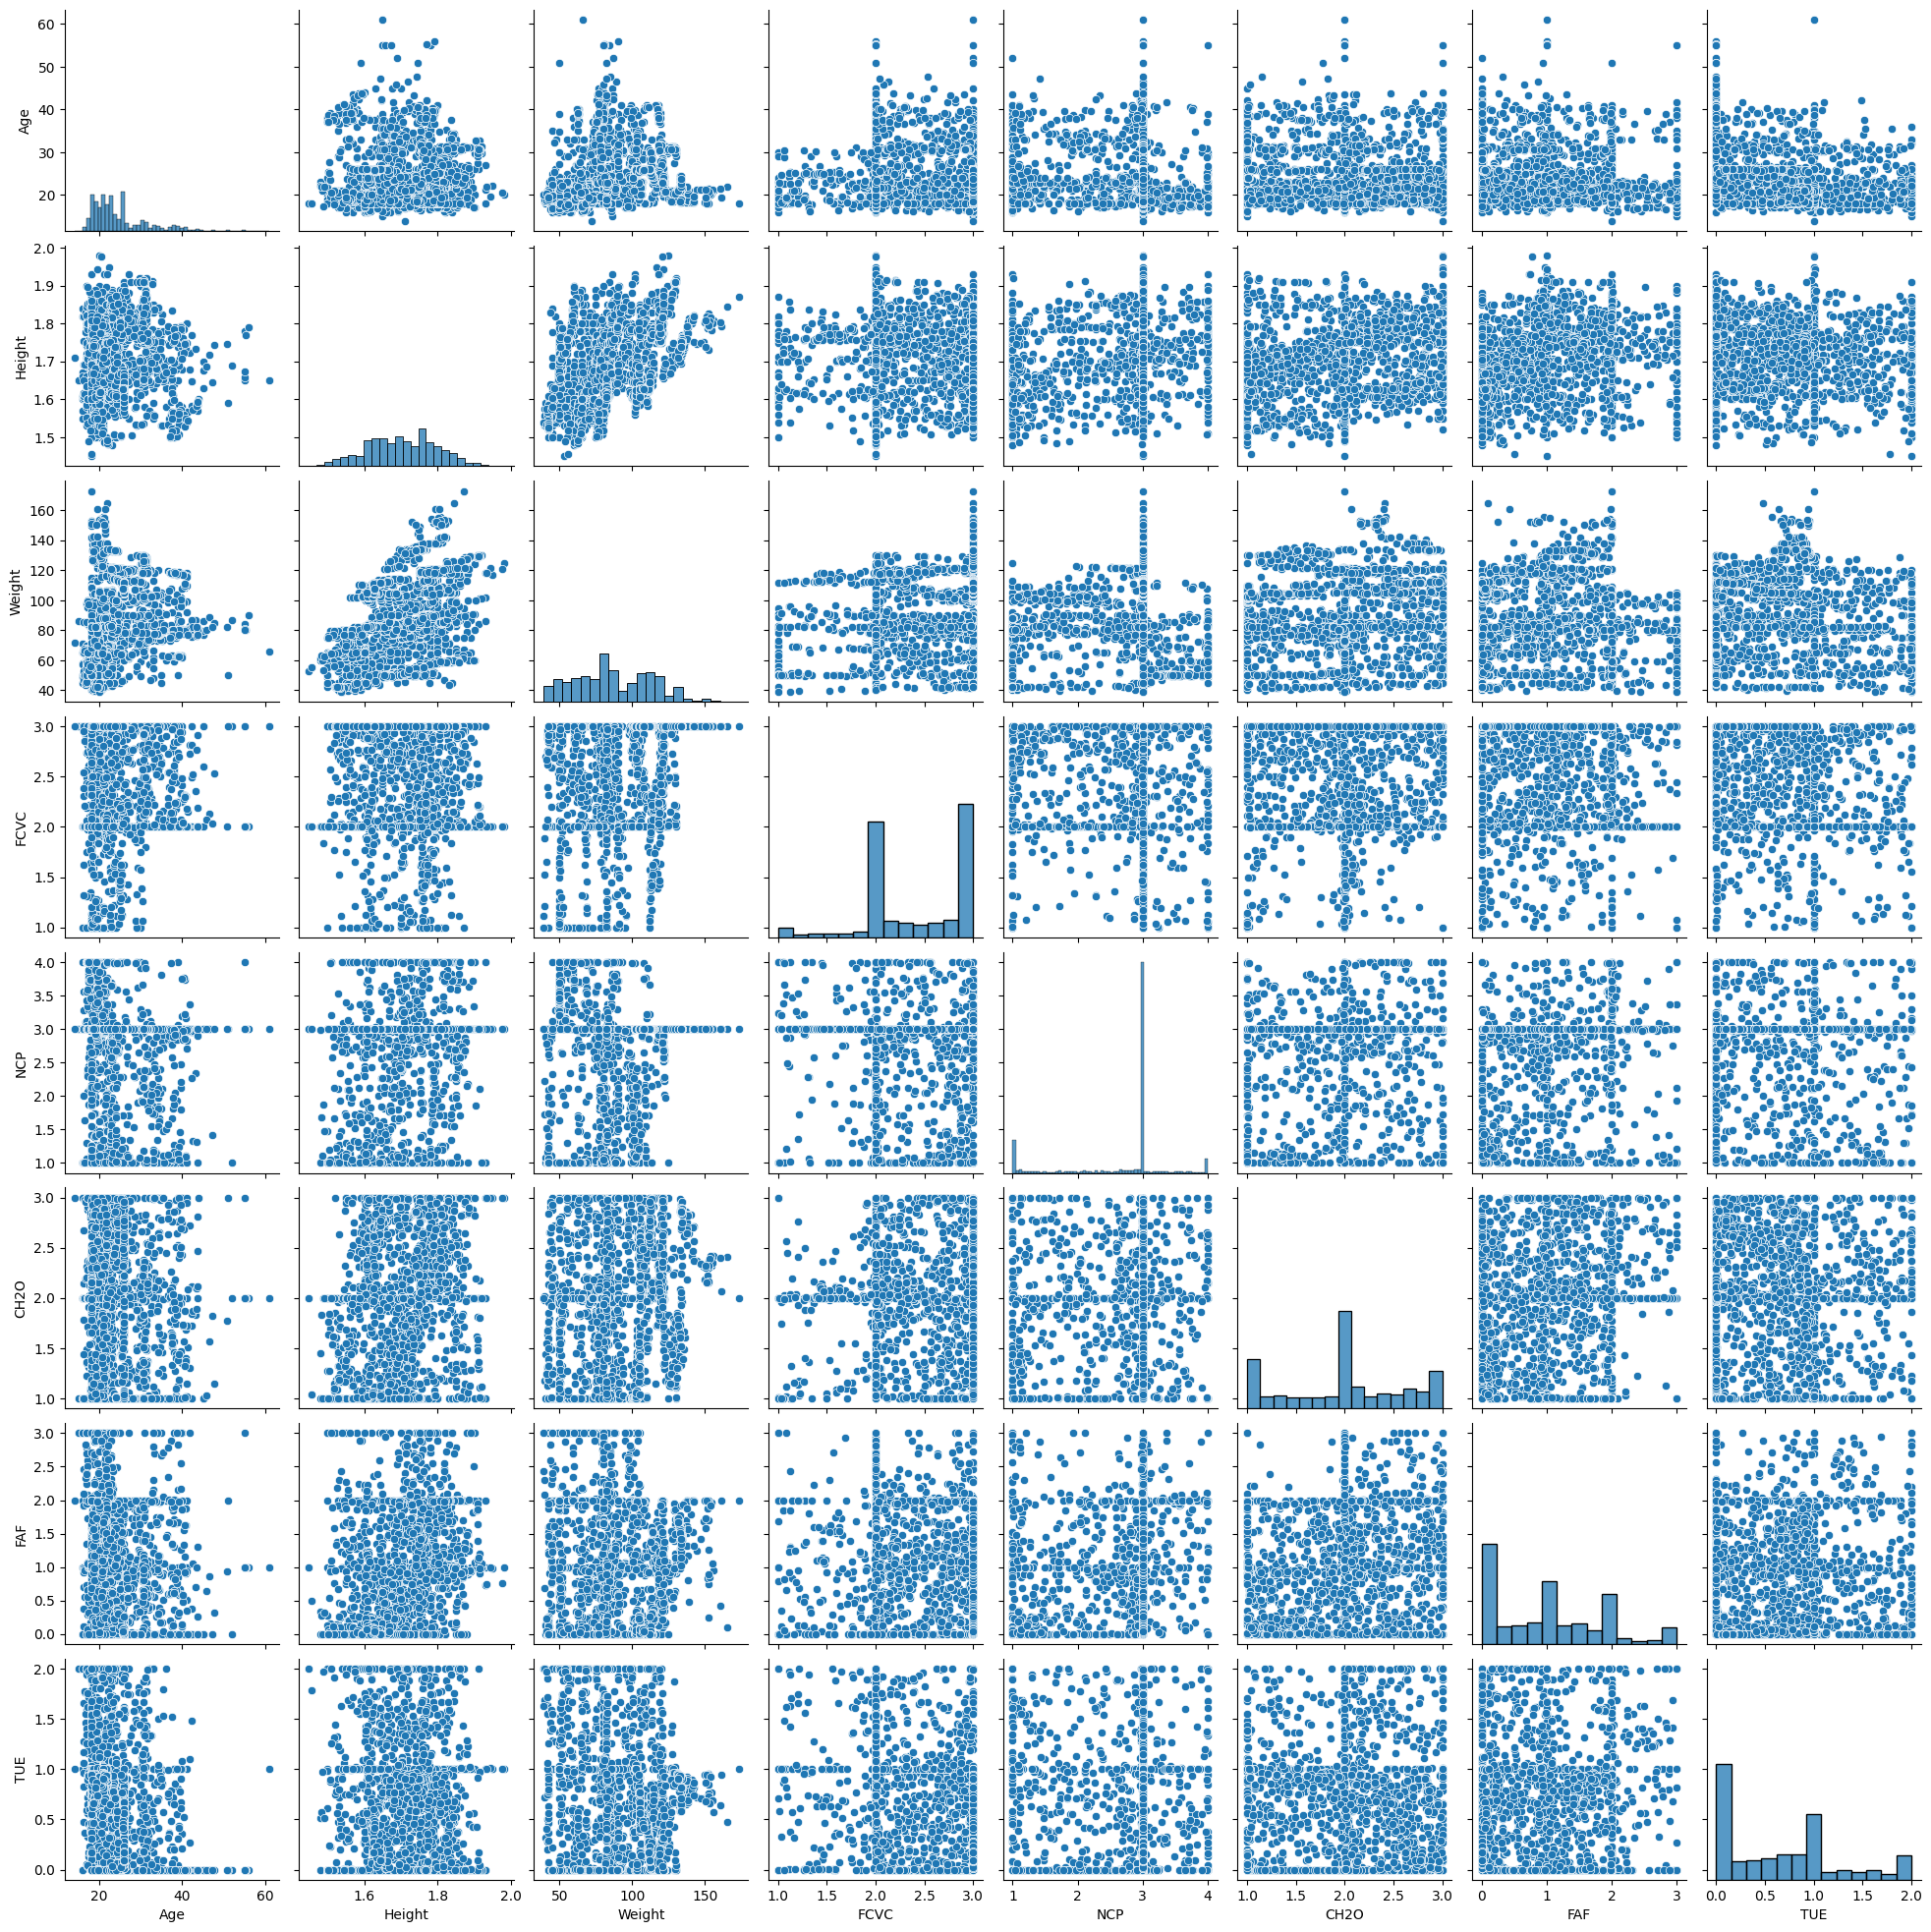

In [134]:
# Explanation and Documentation 
sns.pairplot(data)

In [ ]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

In [ ]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)